In [1]:
import matplotlib.pyplot as plt 
import torch
import imageio
from dataIO import loadImgs_plus
from dataIO import evaluation_entry

In [4]:
# torch.sum(torch.FloatTensor([1,32]))

P1, (1)

In [ ]:



path = '/Users/david/Desktop/venv_enviorments/cmput414_labs/lab1/data/highway/input/'
ft = 'jpg'

#numpy array
imgs = loadImgs_plus(path, ft)
# flatten numpy array to tensor, and caculate mean
bkim = imgs.type(torch.FloatTensor).mean(dim = 0)

for i in range(imgs.shape[0]):
    plt.imshow(imgs[i].cpu().numpy()/255.0) 
    plt.pause(0.01)
    
fig = plt.figure(figsize = (4,4))

# matplot img show belogs to 0 to 1; rgb max = 255
plt.imshow(bkim.detach().cpu().numpy()/255.0) 
plt.show()

P1, (2)

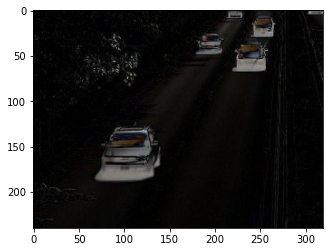

In [6]:
# for i in range(imgs.shape[0]):
#     imgs[i] = torch.absolute(imgs[i]-bkim)

noB_img1k  = torch.absolute(imgs[1000]-bkim)
plt.imshow(noB_img1k.cpu().numpy()/255.0) 
plt.pause(0.01)
    

P1, (3)

https://en.wikipedia.org/wiki/Thresholding_(image_processing)

tensor(65, dtype=torch.uint8)


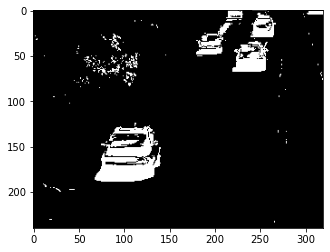

In [7]:
t_value = 100.0

#img size [240, 320, 3]
# sum rgb value together, eziest way; or get avg rgb value on last dim

size = imgs[0].size()
print(imgs[0][0][0][0])

def g_fun(p, t):
    #print(p)
    if p > t:
        return 255.0;
    else:
        return 0.0;

# design for compare pixel
def compare(cur_img) :
    for i1 in range(size[0]):
        for i2 in range(size[1]):
            for i3 in range(size[2]):
                twoColorChannel = torch.sum(cur_img[i1][i2])
                cur_img[i1][i2][i3] = g_fun(twoColorChannel, t_value)
    return cur_img

# for i in range(imgs.shape[0]):
noB_img1k = compare(noB_img1k)




 
    
plt.imshow(noB_img1k.cpu().numpy()/255.0) 
plt.pause(0.01)